<a href="https://colab.research.google.com/github/Hamid-abdellaoui/crop-yield-predection/blob/main/croprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Vector autoregression

In [232]:
#import required packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [233]:
from sklearn.metrics import mean_squared_error

In [234]:
#read the data
path="https://raw.githubusercontent.com/Hamid-abdellaoui/crop-yield-predection/main/bt.csv"
df = pd.read_csv(path, sep=';', index_col = ['date'])

#check the dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 1990/1991 to 2019/2020
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   production  30 non-null     float64
 1   superficie  30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 720.0+ bytes


In [235]:
df.head()

,production,superficie
date,,
1990/1991,200280.0,86700
1991/1992,38350.0,79900
1992/1993,97300.0,61200
1993/1994,204400.0,102200
1994/1995,9570.0,63800


In [236]:
path='https://raw.githubusercontent.com/Hamid-abdellaoui/crop-yield-predection/main/Daily%2030%20years.csv'
data = pd.read_csv(path, sep=';' , parse_dates = ['date'], index_col = ['date'])
data=data.drop(['tmax','tmin'], axis=1)
data['prcp'] = data['prcp'].fillna(0)
data['prcp'] = data['prcp'].fillna(0)
data.head()

,tavg,prcp
date,,
1990-01-01,11.6,0.0
1990-02-01,12.8,0.5
1990-03-01,10.7,4.1
1990-04-01,9.8,13.0
1990-05-01,10.3,1.0


In [237]:
monthlyData=pd.DataFrame()
monthlyData['prcp']=data['prcp'].resample('M').sum()
monthlyData['tavg']=data['tavg'].resample('M').mean()
monthlyData.drop(monthlyData.tail(1).index,inplace=True)
monthlyData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 372 entries, 1990-01-31 to 2020-12-31
Freq: M
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   prcp    372 non-null    float64
 1   tavg    372 non-null    float64
dtypes: float64(2)
memory usage: 8.7 KB


In [238]:
monthlyData.loc[monthlyData.index.month == 5 , ['prcp']] = 0
monthlyData.loc[monthlyData.index.month == 6 , ['prcp']] = 0
monthlyData.loc[monthlyData.index.month == 7 , ['prcp']] = 0
monthlyData.loc[monthlyData.index.month == 8 , ['prcp']] = 0
monthlyData.loc[monthlyData.index.month == 9 , ['prcp']] = 0

In [239]:
yearlyData=pd.DataFrame()
yearlyData['prcp']=monthlyData['prcp'][5:365].resample('12M').sum()
yearlyData['tavg']=monthlyData['tavg'][5:365].resample('12M').mean()
yearlyData.drop(yearlyData.head(1).index,inplace=True)
yearlyData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 1991-06-30 to 2020-06-30
Freq: 12M
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   prcp    30 non-null     float64
 1   tavg    30 non-null     float64
dtypes: float64(2)
memory usage: 720.0 bytes


In [240]:
df.index=yearlyData.index  
df['precipetations']=yearlyData.prcp
df['temperatures']=yearlyData.tavg
df['ratio'] = df['production']/df['superficie']
df.head()

,production,superficie,precipetations,temperatures,ratio
date,,,,,
1991-06-30,200280.0,86700,252.8,16.053253,2.310035
1992-06-30,38350.0,79900,94.1,16.152066,0.479975
1993-06-30,97300.0,61200,179.8,15.893268,1.589869
1994-06-30,204400.0,102200,184.3,15.711569,2.000000
1995-06-30,9570.0,63800,77.3,16.786741,0.150000


In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 1991-06-30 to 2020-06-30
Freq: 12M
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   production      30 non-null     float64
 1   superficie      30 non-null     int64  
 2   precipetations  30 non-null     float64
 3   temperatures    30 non-null     float64
 4   ratio           30 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.4 KB


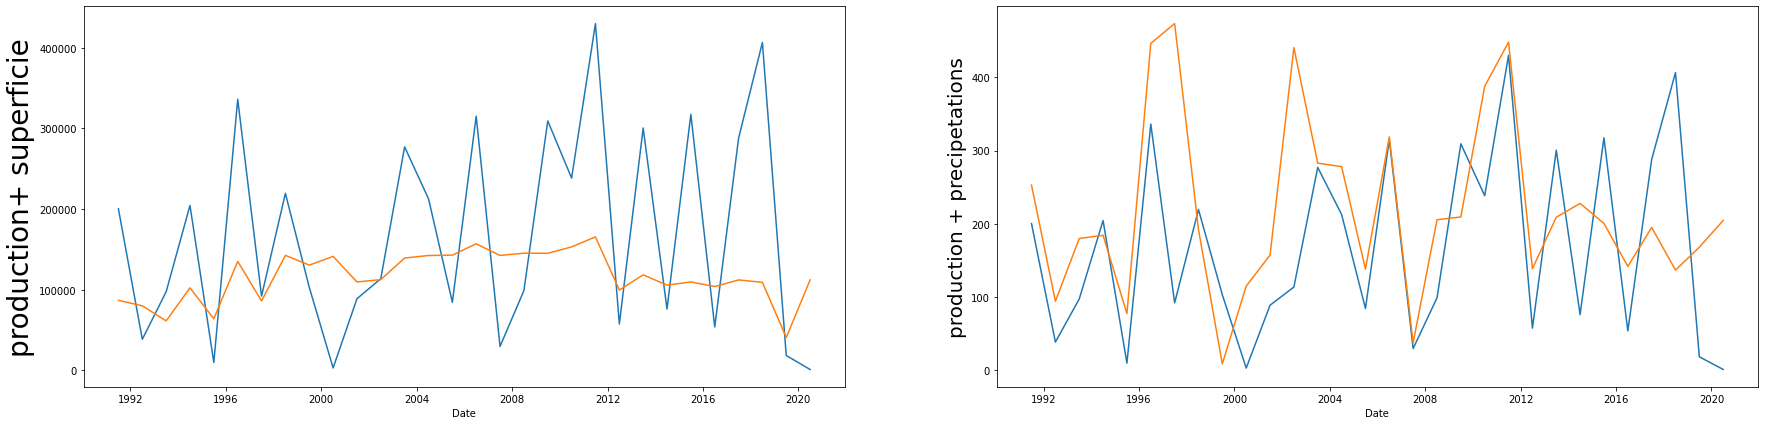

In [242]:
fig, ax = plt.subplots(figsize=(30, 7))
plt.subplot(121)
plt.xlabel('Date')
plt.ylabel('production+ superficie',fontsize=28)
plt.plot(df['production'])
plt.plot(df['superficie'])

plt.subplot(122)
plt.xlabel('Date')
plt.ylabel('production + precipetations',fontsize=20)
plt.plot(df['production']/1000)
plt.plot(df['precipetations'])


plt.show()

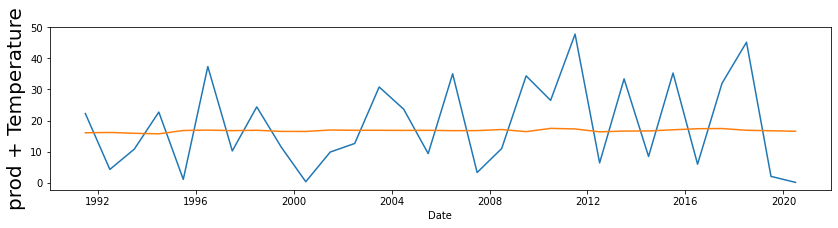

In [243]:
fig, ax = plt.subplots(figsize=(14, 3))
plt.xlabel('Date')
plt.ylabel('prod + Temperature',fontsize=20)
plt.plot(df['production']/9000)
plt.plot(df['temperatures'])

In [244]:
# VAR example
from statsmodels.tsa.vector_ar.var_model import VAR
from random import random
# contrived dataset with dependency
data = list()
for i in range(30):
  v0 = df.index[i].year
  v1 = df['precipetations'][i]
  v2 = df['production'][i]
  row = [v0, v1, v2]
  data.append(row)
data

[[1991, 252.79999999999998, 200280.0],
 [1992, 94.1, 38350.0],
 [1993, 179.8, 97300.0],
 [1994, 184.29999999999998, 204400.0],
 [1995, 77.3, 9570.0],
 [1996, 446.49999999999994, 336150.0],
 [1997, 473.5, 91910.0],
 [1998, 192.10000000000002, 219450.0],
 [1999, 8.6, 103020.0],
 [2000, 114.80000000000001, 2820.0],
 [2001, 157.20000000000002, 88700.0],
 [2002, 440.70000000000005, 113520.0],
 [2003, 282.79999999999995, 277030.0],
 [2004, 278.0, 212648.3874],
 [2005, 138.1, 84252.0],
 [2006, 318.70000000000005, 315168.0],
 [2007, 37.3, 29498.5],
 [2008, 205.5, 98812.3867],
 [2009, 209.3, 309244.4],
 [2010, 387.8, 238312.035],
 [2011, 448.09999999999997, 430040.0],
 [2012, 138.6, 57312.252],
 [2013, 208.9, 300482.0],
 [2014, 227.8, 75921.1884],
 [2015, 200.39999999999998, 317407.65],
 [2016, 141.7, 53592.0],
 [2017, 195.00000000000003, 287840.0],
 [2018, 136.70000000000002, 406570.0],
 [2019, 168.0, 18252.0],
 [2020, 204.60000000000002, 873.6]]

In [245]:
# fit model FOR TESTING
model = VAR(data[:26])
model_fit = model.fit()
# make prediction
yhat = model_fit.forecast(model_fit.y, steps=1)
for i in range(len(yhat)):
  print( ' date : ',round(yhat[i][0],0),'\t','precipetations:',yhat[i][1],'\t','production : ',yhat[i][2],'\t \n')

 date :  2017.0 	 precipetations: 261.76895874277307 	 production :  310215.11319744587 	 



/usr/local/lib/python3.7/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [246]:
# fit model
model = VAR(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.forecast(model_fit.y, steps=1)
print( ' date :         ',round(yhat[0][0],0),'\n','precipetations:',yhat[0][1],'\n','production :   ',yhat[0][2],'\n')

 date :          2021.0 
 precipetations: 261.75064576476325 
 production :    323763.84306795336 



/usr/local/lib/python3.7/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


#linear regression

In [247]:
X = df[['precipetations', 'temperatures']]
y = df['production']

In [248]:
from sklearn import linear_model

In [249]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [252]:
#testing (eg: 2016)
predicted = regr.predict([[195.5, 17]])
print(predicted[0])

169504.9940409296


In [251]:
predicted = regr.predict([[329.5, 17]])
print(predicted[0])

229425.82388398598
